In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets,linear_model,discriminant_analysis,cross_validation

E:\python 3.5\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
#加载数据
def load_data():
    diabetes = datasets.load_diabetes()
    return cross_validation.train_test_split(diabetes.data,diabetes.target,test_size = 0.25 ,random_state = 0)


## 库实现线性回归模型

In [7]:
def test_LinearRegression(*data):
    x_train,x_test,y_train,y_test = data
    regr = linear_model.LinearRegression()
    regr.fit(x_train,y_train)
    print('Coefficients:%s.intercept %.2f'%(regr.coef_,regr.intercept_))
    print('Residual sum of squares: %.2f'% np.mean((regr.predict(x_test) - y_test) ** 2))
    print('Score: %.2f'%regr.score(x_test,y_test))

In [8]:
x_train,x_test,y_train,y_test = load_data()
test_LinearRegression(x_train,x_test,y_train,y_test)

Coefficients:[ -43.26774487 -208.67053951  593.39797213  302.89814903 -560.27689824
  261.47657106   -8.83343952  135.93715156  703.22658427   28.34844354].intercept 153.07
Residual sum of squares: 3180.20
Score: 0.36


#### LinearRegression()参数
#### fit_intercept是否需要计算b值
#### cops_x是否复制x
#### normalize是否需要正则化


### 多元线性回归的正则化

#### 岭回归

In [9]:
def test_Ridge(*data):
    x_train,x_test,y_train,y_test = data
    regr = linear_model.Ridge()
    regr.fit(x_train,y_train)
    print('Coefficients:%s.intercept %.2f'%(regr.coef_,regr.intercept_))
    print('Residual sum of squares: %.2f'% np.mean((regr.predict(x_test) - y_test) ** 2))
    print('Score: %.2f'%regr.score(x_test,y_test))

In [13]:
x_train,x_test,y_train,y_test = load_data()
test_Ridge(x_train,x_test,y_train,y_test)

Coefficients:[  21.19927911  -60.47711393  302.87575204  179.41206395    8.90911449
  -28.8080548  -149.30722541  112.67185758  250.53760873   99.57749017].intercept 152.45
Residual sum of squares: 3192.33
Score: 0.36


#### Ridge参数
#### alpha值越大正则化项占比越大
#### fit_intercept是否需要计算b值
#### max_iter迭代次数
#### normalize是否在回归前要归一化
#### solver求解最优化问题的算法
#### tol判断迭代收敛与否的阀值
#### random_state随机

In [12]:
def test_Ridge_alpha(*data):
    x_train,x_test,y_train,y_test = data
    alphas = [0.01,0.02,0.05,0.1,0.2,0.5,1,2,5,10,20,50,100,200,500,1000]
    scores = []
    for i,alpha in enumerate(alphas):
        regr = linear_model.Ridge(alpha= alpha)
        regr.fit(x_train,y_train)
        scores.append(regr.score(x_test,y_test))
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alphas,scores)
    ax.set_xlabel(r'$\alpha$')
    ax.set_ylabel(r'score')
    ax.set_xscale('log')
    ax.set_title('Ridge')
    plt.show()

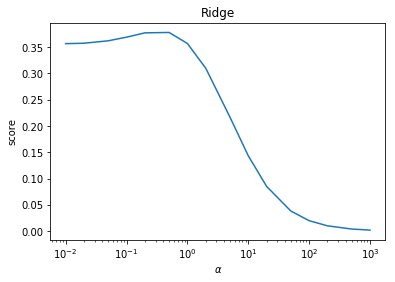

In [14]:
x_train,x_test,y_train,y_test = load_data()
test_Ridge_alpha(x_train,x_test,y_train,y_test)

#### Lasso回归

In [15]:
def test_Lasso(*data):
    x_train,x_test,y_train,y_test = data
    regr = linear_model.Lasso()
    regr.fit(x_train,y_train)
    print('Coefficients:%s.intercept %.2f'%(regr.coef_,regr.intercept_))
    print('Residual sum of squares: %.2f'% np.mean((regr.predict(x_test) - y_test) ** 2))
    print('Score: %.2f'%regr.score(x_test,y_test))

In [16]:
x_train,x_test,y_train,y_test = load_data()
test_Lasso(x_train,x_test,y_train,y_test)

Coefficients:[  0.          -0.         442.67992538   0.           0.
   0.          -0.           0.         330.76014648   0.        ].intercept 152.52
Residual sum of squares: 3583.42
Score: 0.28


#### Lasso参数
#### alpha值越大正则化项占比越大
#### fit_intercept是否需要计算b值
#### max_iter迭代次数
#### normalize是否在回归前要归一化
#### solver求解最优化问题的算法
#### tol判断迭代收敛与否的阀值
#### random_state随机

In [17]:
def test_Lasso_alpha(*data):
    x_train,x_test,y_train,y_test = data
    alphas = [0.01,0.02,0.05,0.1,0.2,0.5,1,2,5,10,20,50,100,200,500,1000]
    scores = []
    for i,alpha in enumerate(alphas):
        regr = linear_model.Ridge(alpha= alpha)
        regr.fit(x_train,y_train)
        scores.append(regr.score(x_test,y_test))
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alphas,scores)
    ax.set_xlabel(r'$\alpha$')
    ax.set_ylabel(r'score')
    ax.set_xscale('log')
    ax.set_title('Ridge')
    plt.show()

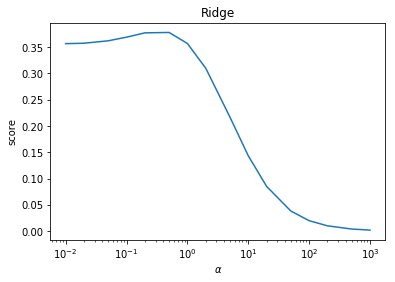

In [18]:
x_train,x_test,y_train,y_test = load_data()
test_Lasso_alpha(x_train,x_test,y_train,y_test)

#### ElasticNet回归

In [19]:
def test_ElasticNet(*data):
    x_train,x_test,y_train,y_test = data
    regr = linear_model.ElasticNet()
    regr.fit(x_train,y_train)
    print('Coefficients:%s.intercept %.2f'%(regr.coef_,regr.intercept_))
    print('Residual sum of squares: %.2f'% np.mean((regr.predict(x_test) - y_test) ** 2))
    print('Score: %.2f'%regr.score(x_test,y_test))

In [20]:
x_train,x_test,y_train,y_test = load_data()
test_ElasticNet(x_train,x_test,y_train,y_test)

Coefficients:[ 0.40560736  0.          3.76542456  2.38531508  0.58677945  0.22891647
 -2.15858149  2.33867566  3.49846121  1.98299707].intercept 151.93
Residual sum of squares: 4922.36
Score: 0.01


#### Lasso参数
#### l1_ratio p值
#### alpha值越大正则化项占比越大
#### fit_intercept是否需要计算b值
#### max_iter迭代次数
#### normalize是否在回归前要归一化
#### solver求解最优化问题的算法
#### tol判断迭代收敛与否的阀值
#### random_state随机

In [34]:
def test_ElasticNet_alpha_rho(*data):
    x_train,x_test,y_train,y_test = data
    alphas = np.logspace(-2,2)
    rhos = np.linspace(0.01,1)
    scores = []
    for alpha in alphas:
        for rho in rhos:
            regr = linear_model.ElasticNet(alpha= alpha,l1_ratio=rho)
            regr.fit(x_train,y_train)
            scores.append(regr.score(x_test,y_test))
    alphas,rhos = np.meshgrid(alphas,rhos)
    scores = np.array(scores).reshape(alphas.shape)
    from mpl_toolkits.mplot3d import Axes3D
    from matplotlib import cm
    fig = plt.figure()
    ax = Axes3D(fig)
    surf = ax.plot_surface(alphas,rhos,scores,rstride = 1,cstride = 1,cmap = cm.jet,linewidth = 0,antialiased = False)
    fig.colorbar(surf,shrink = 0.5,aspect = 5)
    ax.set_xlabel(r'$\alpha$')
    ax.set_ylabel(r'$\rho$')
    ax.set_zlabel('score')
    ax.set_title('Ridge')
    plt.show()

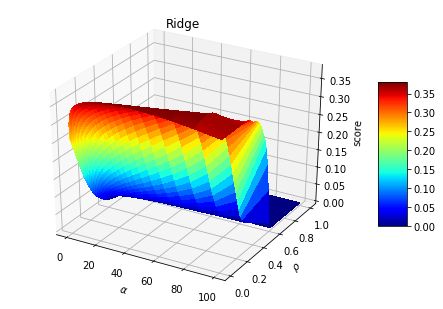

In [35]:
x_train,x_test,y_train,y_test = load_data()
test_ElasticNet_alpha_rho(x_train,x_test,y_train,y_test)

## 代码实现多元线性回归

# 参数 = ((x_b.T * x_b) ^ -1) * x_b.T * y

In [2]:
def fit(x_train,y_train):
    x_b = np.hstack([np.ones((len(x_train),1)),x_train])
    _theta = np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T.dot(y_train))
    _coef = _theta[1:]#系数
    _interception = _theta[0]#参数b
def predict(x_test):
    x_b = np.hstack([np.ones((len(x_test),1)),x_test])
    return x_b.dot(x_test)

In [4]:
def fit_gd(self, X_train, y_train, eta=0.01, n_iters=1e4):
        """根据训练数据集X_train, y_train, 使用梯度下降法训练Linear Regression模型"""
        assert X_train.shape[0] == y_train.shape[0], \
            "the size of X_train must be equal to the size of y_train"

        def J(theta, X_b, y):#每一行的误差和
            try:
                return np.sum((y - X_b.dot(theta)) ** 2) / len(y)
            except:
                return float('inf')

        def dJ(theta, X_b, y):#返回的是每个参数误差
            return X_b.T.dot(X_b.dot(theta) - y) * 2. / len(X_b)

        def gradient_descent(X_b, y, initial_theta, eta, n_iters=1e4, epsilon=1e-8):

            theta = initial_theta
            cur_iter = 0

            while cur_iter < n_iters:
                gradient = dJ(theta, X_b, y)
                last_theta = theta
                theta = theta - eta * gradient
                if (abs(J(theta, X_b, y) - J(last_theta, X_b, y)) < epsilon):
                    break

                cur_iter += 1

            return theta

        X_b = np.hstack([np.ones((len(X_train), 1)), X_train])
        initial_theta = np.zeros(X_b.shape[1])
        self._theta = gradient_descent(X_b, y_train, initial_theta, eta, n_iters)

        self.intercept_ = self._theta[0]
        self.coef_ = self._theta[1:]

        return self